In [1]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode

from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')

%matplotlib inline

In [23]:
data = pd.read_csv('../candy_production.csv', index_col=['observation_date'])
data = data.iloc[int(len(data)*0.9):]

In [24]:
data.head()

,IPG3113N
observation_date,
2013-02-01,102.0263
2013-03-01,102.6319
2013-04-01,95.3206
2013-05-01,91.7584
2013-06-01,91.8125


In [63]:
def plotMovingAverage(series, window, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))   
    plt.title("Скользящее среднее\n ширина окна = {}".format(window))
    plt.plot(rolling_mean, "g", label="Сглаженное значение")
        
    plt.plot(series[window:], label="Актуальное значение")
    plt.gcf().autofmt_xdate()
    plt.grid(True)

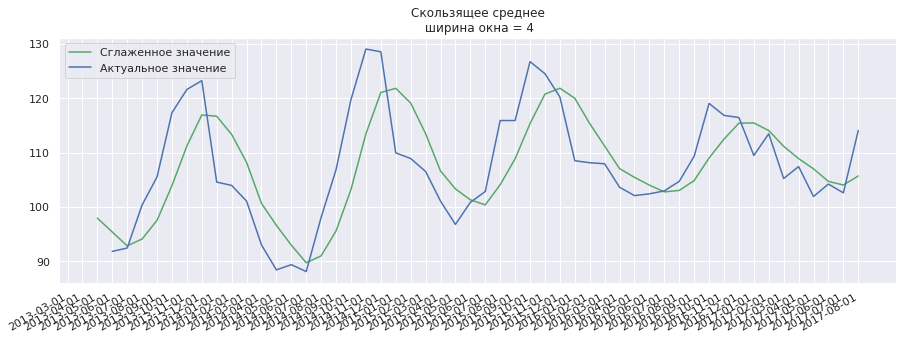

In [35]:
plotMovingAverage(data, 4)

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = pd.read_csv('../candy_production.csv', index_col=['observation_date'])

# data.index.freq = 'MS'
size = int(len(data)*0.7)
train, test = data.iloc[:size, 0], data.iloc[size:, 0]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])



In [53]:
pred.head()

2003-12-01    133.501232
2004-01-01    122.500584
2004-02-01    119.931676
2004-03-01    116.223347
2004-04-01    109.477272
Freq: MS, dtype: float64

In [55]:
plt.figure(figsize=(15,5))
# plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Holt-Winters')
plt.legend(loc='best')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd16f1100d0> (for post_execute):


ValueError: view limit minimum -36827.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36827.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [56]:
data = pd.read_csv('./data.csv')

In [57]:
data.head()

,x,y1,y2
0,1,91,91
1,2,127,127
2,3,172,172
3,4,226,226
4,5,93,93


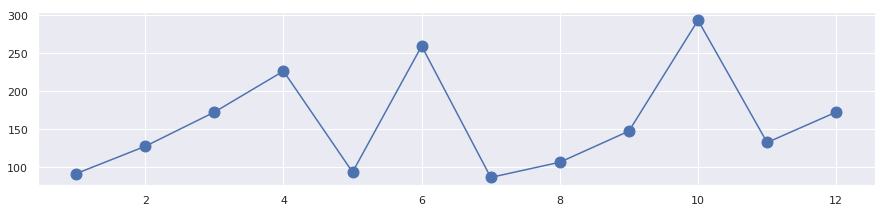

In [69]:
# plotMovingAverage(data, 2)
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.scatter(data.x,data.y1, s=120)
plt.plot(data.x, data.y1)

In [74]:
data1 = data.drop(['y2'], axis=1)
size = int(len(data1)*0.7)
train, test = data1.iloc[:size, 0], data1.iloc[size:, 0]
model = ExponentialSmoothing(data1, seasonal='mul', seasonal_periods=2).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

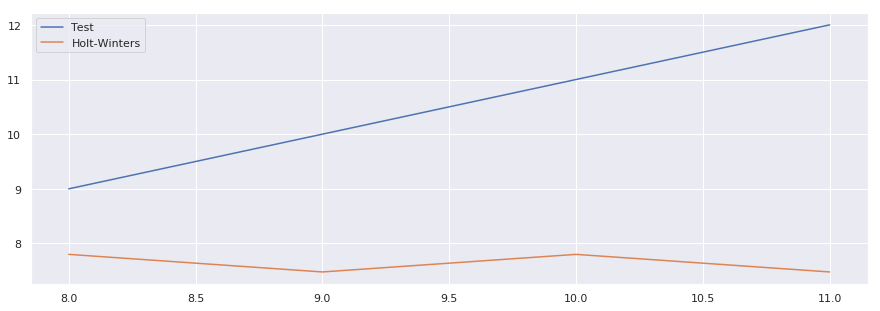

In [73]:
plt.figure(figsize=(15,5))
# plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Holt-Winters')
plt.legend(loc='best')

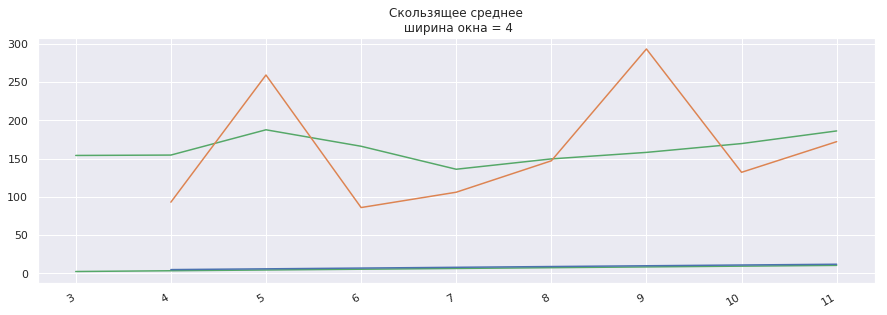

In [76]:
plotMovingAverage(data1, 4)

In [1]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


In [84]:
 
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = data1
X = series.y1
# size = int(len(X) * 0.9)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: d > 2 is not supported

In [86]:
series = data1
X = series.y1
predictions = list()
model = ARIMA(history, order=(2,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
# yhat = output[0]
# predictions.append(yhat)
# obs = test[t]
# history.append(obs)
# print('predicted=%f, expected=%f' % (yhat, obs))



ValueError: could not broadcast input array from shape (2) into shape (1)

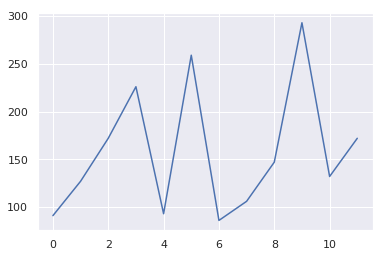

In [89]:
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# plot
pyplot.plot(X)
pyplot.plot(output, color='red')
pyplot.show()

In [2]:
############################################################################################
############################################################################################
############################################################################################
############################################################################################
############################################################################################

In [72]:
import numpy as np
import scipy.stats as sp_stats
import statsmodels.api as sm

n = 300
x = np.arange(n, dtype=np.double)
y = np.random.randn(n)

def subwindow_bounds(n):
    for i in range(n):
        for j in range(i+1, n+1):
            yield i, j

In [73]:
type(x)

numpy.ndarray

In [40]:
def algebraic_linear_regression_on_subwindow(x, y, i, j):
    s = {
        (0, 0): np.sum(np.ones_like(x[i:j])),
        (1, 0): np.sum(x[i:j]),
        (0, 1): np.sum(y[i:j]),
        (2, 0): np.sum(np.square(x[i:j])),
        (1, 1): np.sum(np.multiply(x[i:j], y[i:j])),
        (0, 2): np.sum(np.square(y[i:j])),
    }
    
    beta = ((s[(0,0)]*s[(1,1)]-s[(1,0)]*s[(0,1)]) /
            (s[(0,0)]*s[(2,0)]-s[(1,0)]**2))
    
    alpha = (s[(0,1)]-beta*s[(1,0)])/s[(0,0)]
    
    return alpha, beta

In [45]:
alphas = []
betas = []
%timeit 
for i, j in subwindow_bounds(n):
    alpha, beta = algebraic_linear_regression_on_subwindow(x, y, i, j)
    alphas.append(alpha)
    betas.append(beta)

In [49]:
def subwindow_sums(v):
    return np.cumsum(np.triu(np.tile(v, (len(v), 1))), axis=-1)

In [52]:
def algebraic_linear_regression_on_all_subwindows(x, y):
    s = {
        (0, 0): subwindow_sums(np.ones_like(x)),
        (1, 0): subwindow_sums(x),
        (0, 1): subwindow_sums(y),
        (2, 0): subwindow_sums(np.square(x)),
        (1, 1): subwindow_sums(np.multiply(x, y)),
        (0, 2): subwindow_sums(np.square(y)),
    }
    
    beta = ((s[(0,0)]*s[(1,1)]-s[(1,0)]*s[(0,1)]) /
            (s[(0,0)]*s[(2,0)]-s[(1,0)]**2))
    
#     print(beta)
    
    alpha = (s[(0,1)]-beta*s[(1,0)])/s[(0,0)]
    
    return alpha, beta

In [142]:
n = 3
x = np.arange(n, dtype=np.double)
y = np.random.randn(n)
y
# %time algebraic_linear_regression_on_all_subwindows(x, y)

array([ 0.33842381, -0.50669843, -1.2574562 ])

In [187]:
data = pd.read_csv('./data.csv')
x = data.x
y = data.y
x = np.array(x, dtype=np.double)[np.newaxis]
y = np.array(y, dtype=np.double)[np.newaxis]
%time alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
new_x = [13, 14, 15, 16,17,18,19,20,21,22,23,24];
new_y = alpha + beta*np.array(x, dtype=np.double)

CPU times: user 326 µs, sys: 36 µs, total: 362 µs
Wall time: 369 µs


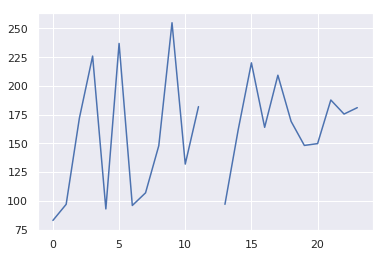

In [188]:
tmp = np.append(y, new_y)
pyplot.plot(tmp)
pyplot.show()

In [210]:
data = pd.read_csv('./network.csv')
data.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


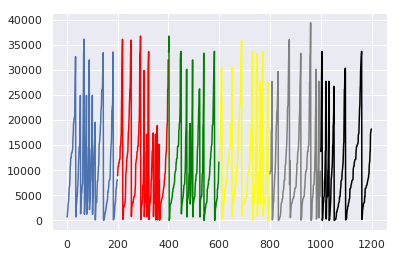

In [211]:
data = data.r_asn
pyplot.plot(data[:200])
pyplot.plot(data[200:400], 'red')
pyplot.plot(data[400:600], 'green')
pyplot.plot(data[600:800], 'yellow')
pyplot.plot(data[800:1000], 'grey')
pyplot.plot(data[1000:1200], 'black')
pyplot.show()

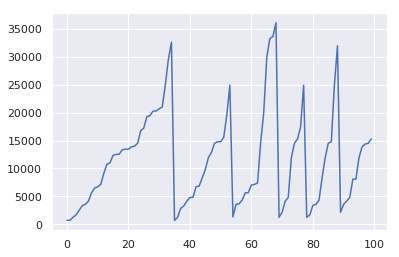

In [213]:
pyplot.plot(data[:100])
pyplot.show()

In [222]:
new_data = data[:100]
x = np.array(range(100), dtype=np.double)[np.newaxis]
y = np.array(new_data, dtype=np.double)[np.newaxis]
%time alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
new_x = np.array(range(100,200), dtype=np.double)[np.newaxis]
new_y = alpha + beta*np.array(x, dtype=np.double)

CPU times: user 458 µs, sys: 122 µs, total: 580 µs
Wall time: 515 µs


ValueError: x and y must have same first dimension, but have shapes (100,) and (150,)

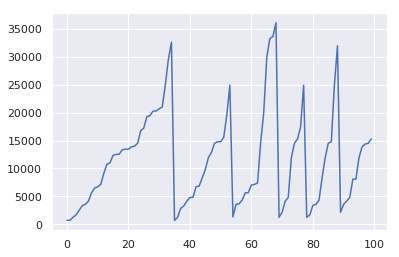

In [250]:
pyplot.plot(data[:100])
pyplot.plot(range(100, 2*100), new_y[0], 'red')
pyplot.show()

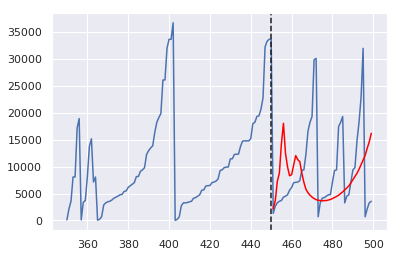

In [100]:
# data = pd.read_csv('./lte.csv')
# data = data.Traffic
data = pd.read_csv('./network.csv')
data = data.r_asn
left = 350
right = 450
count = right - left
new_data = data[left:right]
x = np.array(range(count), dtype=np.double)[np.newaxis]
y = np.array(new_data, dtype=np.double)[np.newaxis]
alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
new_x = np.array(range(count,2*count), dtype=np.double)[np.newaxis]
new_y = alpha + beta*np.array(x, dtype=np.double)
pyplot.plot(data[left:right + 50])
pyplot.plot(range(right, right + 50), new_y[0][:50], 'red')
plt.axvline(right, color='k', linestyle='--')
pyplot.show()

In [377]:
%time
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(pd.Series(data[0:300]), model='multiplicative')
result.plot()
pyplot.show()

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 11.7 µs


AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


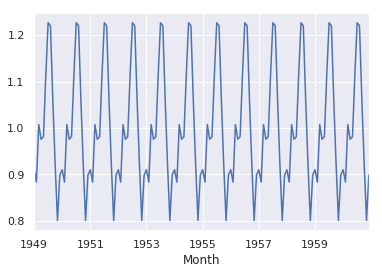

In [355]:
%time
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = Series.from_csv('./airlains.csv', header=0)
result = seasonal_decompose(series, model='multiplicative')
result.seasonal[:100].plot()
# plot()
pyplot.show()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
CPU times: user 347 µs, sys: 185 µs, total: 532 µs
Wall time: 457 µs


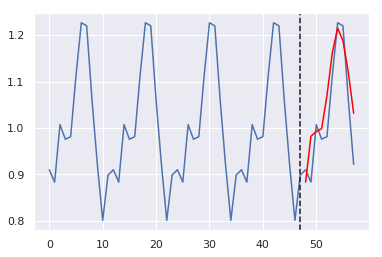

In [371]:
%time
data = result.seasonal.values
left = 36
right = 47
count = right - left
new_data = data[left:right]
x = np.array(range(count), dtype=np.double)[np.newaxis]
y = np.array(new_data, dtype=np.double)[np.newaxis]
%time alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
new_y = alpha + beta*np.array(x, dtype=np.double)
pyplot.plot(range(0, right + count), data[0:right + count])
# len(range(left, right + count))
# len(data)


pyplot.plot(range(right, right + count), new_y[0], 'red')
plt.axvline(right, color='k', linestyle='--')
pyplot.show()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs
CPU times: user 386 µs, sys: 226 µs, total: 612 µs
Wall time: 539 µs


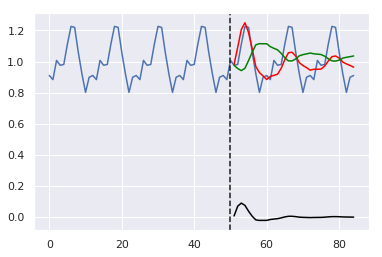

In [445]:
%time
data = result.seasonal.values
left = 15
right = 50
count = right - left
new_data = data[left:right]
x = np.array(range(count), dtype=np.double)[np.newaxis]
y = np.array(new_data, dtype=np.double)[np.newaxis]
%time alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
# new_x = np.array(range(count,2*count), dtype=np.double)[np.newaxis]
# new_x = np.array(np.full((len(x)), 1), dtype=np.double)[np.newaxis]
new_x = x
new_y = alpha + beta*new_x
pyplot.plot(range(0, right + count), data[0:right + count])
pyplot.plot(range(right, right + count), new_y[0], 'red')
plt.axvline(right, color='k', linestyle='--')
pyplot.plot(range(right, right + count), alpha[0], 'green')
pyplot.plot(range(right, right + count), beta[0], 'black')
pyplot.show()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


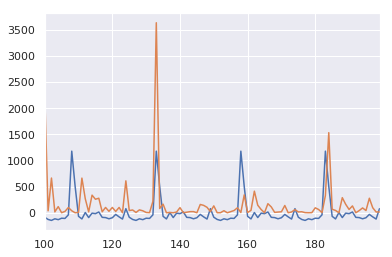

In [46]:
%time
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
# series = pd.read_csv('./network.csv').r_asn[150:300]
series = pd.read_csv('./lte.csv').Traffic[100:200]

# .r_asn.replace(0, 1)[:10000]
result = seasonal_decompose(series, model='aditive', freq=25)
# result.seasonal[:100]
result.seasonal.plot()
series.plot()
# pyplot.show()

In [623]:
series = pd.read_csv('./network.csv')
series = series.drop(['l_ipn', 'f'], axis=1)
# series = pd.Series.from_csv('./network.csv') 
# new_series = Series(series.r_asn, index=series.date)
# series = pd.Series(series)

series.reset_index(inplace=True)
series['date'] = pd.to_datetime(series['date'])
series = series.set_index('date')
# series = series[1:]
series = series.drop(['index'], axis=1)
# len(series)
# .r_asn[150:300]

result = seasonal_decompose(series, model='aditive')

# result.seasonal[:100]
# result[:100].plot()
# series[:100].plot()
# pyplot.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [25]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
def getSeasonalityPeriod(series, left=10, right=80):
    length = len(series)
    midle = int(length/2)
    bestPeriod = 10
    bestMse = 200
    bestSeasonal = None
    count = 0
    for i in range(left, right):
        result = seasonal_decompose(series, model='aditive', freq=i)
        seasonal = result.seasonal[midle:]
        seriesForCheck = series[midle:]
        error = mean_absolute_percentage_error(seriesForCheck, seasonal)
#         print(error)
        count = count + 1
        if(error >= bestMse):
            bestMse = error
            bestPeriod = i
            bestSeasonal = result.seasonal
    print("Count: {}".format(count))
    return bestPeriod, bestMse, bestSeasonal

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.2 µs
Count: 28
25
1090.0340047514396


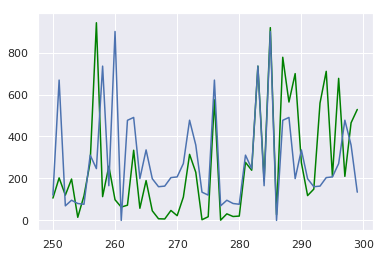

In [82]:
%time
series = pd.read_csv('./lte.csv')
series = series.Traffic[250:300]
period, error, seasonal = getSeasonalityPeriod(series, 2,30)
seasonal += int(abs(min(seasonal)))
print(period)
print(error)
plt.plot(series, 'green')
plt.plot(seasonal)

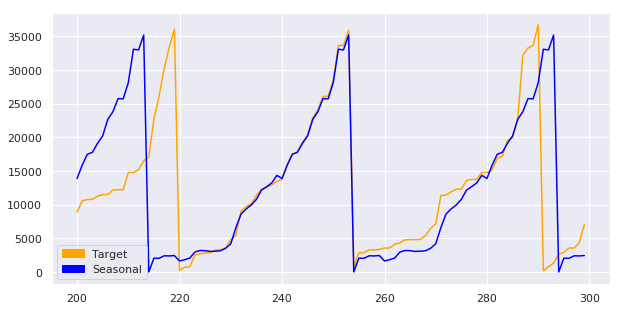

In [88]:

import matplotlib.patches as mpatches

series = pd.read_csv('./network.csv')
series = series.r_asn[200:300]
result = seasonal_decompose(series, model='aditive', freq=40)
seasonal = result.seasonal + abs(min(result.seasonal))

plt.figure(figsize=(10, 5))

targetLine = plt.plot(series, color = "orange", label="target")
seasonalLine = plt.plot(seasonal, color="blue", label="seasonal")

orangePatch = mpatches.Patch(color='orange', label='Target')
bluePatch = mpatches.Patch(color='blue', label='Seasonal')
plt.legend(handles=[orangePatch, bluePatch])

# plt.legend(handles=[targetLine, seasonalLine])

In [102]:
def getBestSeasonalPeriod(series, depth = 10, window = 5):
    length = len(series)
    midleSeries = int(length/2)
    bestPeriod = 10       #REFACTOR
    prevBestPeriod = 20   #REFACTOR
    bestMse = 200         #REFACTOR
    bestSeasonal = None   #REFACTOR
    count = 0
    
    left = 10
    right = 80
    midle = int((right - left) / 2)
    
    for i in range(depth):
#         if(bestPeriod == prevBestPeriod): break
        
        leftMidle = left+ int((midle - left) / 2)
        rightMidle = midle + int((right - midle) / 2)
        
        resultLeft = seasonal_decompose(series, model='aditive', freq=leftMidle)
        resultRight = seasonal_decompose(series, model='aditive', freq=rightMidle)
        
        seasonalLeft = resultLeft.seasonal[midleSeries:] 
        seasonalLeft = seasonalLeft + abs(min(seasonalLeft))
        seasonalRight = resultRight.seasonal[midleSeries:]
        seasonalRight = seasonalRight + abs(min(seasonalRight))
        seriesForCheck = series[midleSeries:]
        errorLeft = mean_absolute_percentage_error(seriesForCheck, seasonalLeft)
        errorRight = mean_absolute_percentage_error(seriesForCheck, seasonalRight)
        count = count + 1
#         print("bestPeriod: {}".format(bestPeriod))
        if(errorRight >= errorLeft):
            bestMse = errorRight
            prevBestPeriod = bestPeriod
            bestPeriod = rightMidle
            bestSeasonal = resultRight.seasonal
            left = midle
            midle = rightMidle
        else:            
            bestMse = errorLeft
            prevBestPeriod = bestPeriod
            bestPeriod = leftMidle
            bestSeasonal = resultLeft.seasonal
            right = midle
            midle = leftMidle
    for i in range(bestPeriod - window, bestPeriod + window):
#         if(bestPeriod == prevBestPeriod): break
        
        result = seasonal_decompose(series, model='aditive', freq=i)
        seasonal = result.seasonal[midle:]
        seriesForCheck = series[midle:]
        error = mean_absolute_percentage_error(seriesForCheck, seasonal)
        count = count + 1
        if(error >= bestMse):
            bestMse = error
            prevBestPeriod = bestPeriod
            bestPeriod = i
            bestSeasonal = result.seasonal
    print("Count: {}".format(count))
    print("bestPeriod: {}".format(bestPeriod))
    return bestPeriod, bestMse, bestSeasonal

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.5 µs
Count: 24
bestPeriod: 31
CPU times: user 553 µs, sys: 252 µs, total: 805 µs
Wall time: 667 µs


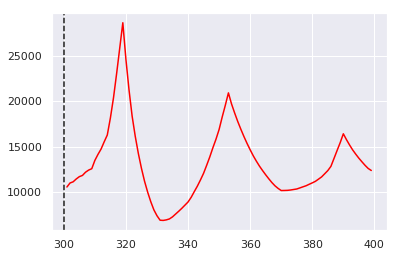

31


In [104]:
%time
series = pd.read_csv('./network.csv')
left = 200
right = 300
count = right - left
series = series.r_asn[left:right]

period, error, seasonal = getBestSeasonalPeriod(series, window=7)

x = np.array(range(count), dtype=np.double)[np.newaxis]
y = np.array(series, dtype=np.double)[np.newaxis]
%time alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
new_x = np.array(range(count,2*count), dtype=np.double)[np.newaxis]
new_y = alpha + beta*np.array(x, dtype=np.double)
plt.plot(series[left:right + count])
plt.plot(range(right, right + count), new_y[0], 'red')
plt.axvline(right, color='k', linestyle='--')
plt.show()


# print(period)
# print(error)
# plt.plot(seasonal)
# plt.plot(series, 'red')

In [106]:
def getLastPeriod(seasonal):
    right = len(seasonal)
    left = right
    value = seasonal[right-1]
    for i in reversed(range(int(right/2), right-2)):
        if(seasonal[i] == value):
            left = i
            break
    return left, right

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.39 µs
Count: 35
bestPeriod: 46
153 - 200


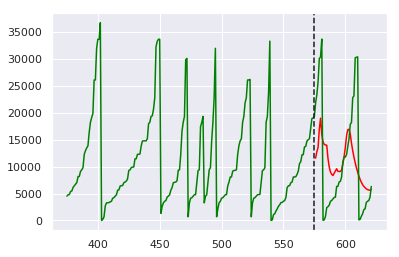

In [114]:
%time
series = pd.read_csv('./network.csv')
left = 375
right = left + 200
count = right - left
oldSeries = series.r_asn
series = oldSeries[left:right]
period, error, seasonal = getBestSeasonalPeriod(series, depth = 15, window=10)

periodLeft, periodRight = getLastPeriod(seasonal.values)
print("{} - {}".format(periodLeft, periodRight))
# plt.plot(seasonal)
# plt.plot(seasonal[left:right], 'red')

periodCount = periodRight - periodLeft

seasonal = seasonal + 10000


# вариант выделения X #####################################
# x = np.array(range(periodLeft, periodRight), dtype=np.double)[np.newaxis]
# y = np.array(seasonal.values[periodLeft:periodRight], dtype=np.double)[np.newaxis]
# %time alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
# # new_x = np.array(range(periodRight,periodRight+periodCount), dtype=np.double)[np.newaxis]
# new_x = np.array(range(int(right/2), int(right/2) + periodCount), dtype=np.double)[np.newaxis]
# new_y = (alpha + beta*np.array(x, dtype=np.double))[0]
######################################
# print(x)
######################################
######################################
x = np.array(range(left, right), dtype=np.double)[np.newaxis]
y = np.array(seasonal.values, dtype=np.double)[np.newaxis]

# y = np.array(series, dtype=np.double)[np.newaxis]

alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
# выделяем область предикшена(это один период сезонности)
alpha = alpha[0][:periodCount]
beta = beta[0][:periodCount]
new_x = [x[0][:periodCount]]

new_y = (alpha + beta*np.array(new_x, dtype=np.double))[0]
######################################
######################################
# len(new_y)
# new_y = seasonal.values[periodLeft:periodRight]

# plt.plot(seasonal, 'blue')
plt.plot(range(right, right + periodCount), new_y, 'red')
plt.plot(oldSeries[left:right + periodCount], 'green')
plt.axvline(right, color='k', linestyle='--')

In [476]:
def getPredict(series, period):
    seasonal = seasonal_decompose(series, model='aditive', freq=period).seasonal
    periodLeft, periodRight = getLastPeriod(seasonal.values)
    periodCount = periodRight - periodLeft

    ########################### REFACTOR
    seasonal = seasonal + 10000
    ###########################

    x = np.array(range(left, right), dtype=np.double)[np.newaxis]
    y = np.array(seasonal.values, dtype=np.double)[np.newaxis]
    alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
    # выделяем область предикшена(это один период сезонности)
    alpha = alpha[0][:periodCount]
    beta = beta[0][:periodCount]
    new_x = [x[0][:periodCount]]

    new_y = (alpha + beta*np.array(new_x, dtype=np.double))[0]
    # берем в виде предикшена наш последний период сезонности
#     new_y = seasonal.values[periodLeft:periodRight]
    return seasonal, new_y


In [477]:
def getSeries(left, right):
    series = pd.read_csv('./network.csv')
    oldSeries = series.r_asn
    series = oldSeries[left:right]
    return series, oldSeries

[[            nan  8.66644444e+02  1.08715556e+03  1.87405556e+03
   2.69169556e+03  2.97156741e+03  3.27022989e+03  2.45108369e+03
   4.92952099e+02 -4.62272278e+02 -9.33984983e+02 -1.15594830e+03
  -1.24045116e+03 -1.24697488e+03 -1.21423963e+03 -1.15904548e+03
  -1.09243088e+03 -1.01324726e+03 -9.31833671e+02 -8.52283821e+02
  -7.74461943e+02 -7.00629759e+02 -6.34678318e+02 -5.74486980e+02
  -5.14903279e+02 -4.45868917e+02 -3.80158073e+02 -3.16613250e+02
  -2.43316569e+02 -1.75239196e+02 -1.59067931e+02 -1.37050720e+02
  -1.11943431e+02 -8.60847277e+01 -6.09878234e+01 -3.90413118e+01
  -4.64150220e+01 -4.58152817e+01 -4.11752096e+01 -3.52076530e+01
  -2.10428459e+01 -7.80854004e+00  5.11299596e+00 -1.53007569e+00
  -3.65515688e+00 -2.28418885e+00  1.23003478e+00  7.65565667e+00
   2.22132778e+01  4.72175315e+01  7.61088627e+01  1.12133600e+02
   1.27113773e+02  9.74314619e+01  7.31293068e+01  5.23726968e+01
   3.43033040e+01  1.85935454e+01  5.05811546e+00 -6.79602904e+00
  -1.70431

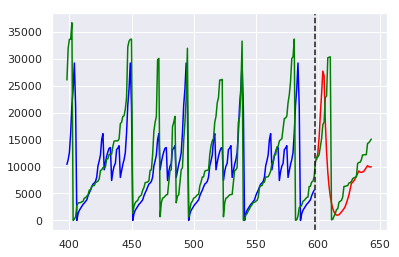

In [516]:
# piplain для подсчета
left = 398
right = left + 200
count = right - left
series, oldSeries = getSeries(left, right)
period = 45

seasonal, predict = getPredict(series, period)

plt.plot(seasonal, 'blue')
plt.plot(range(right, right + len(predict)), predict, 'red')
plt.plot(oldSeries[left:right + len(predict)], 'green')
plt.axvline(right, color='k', linestyle='--')


In [485]:
#real time attempt
# piplain для подсчета
import time
# for i in range(10):
#     left = 398 + i
#     right = left + 200
#     count = right - left
#     series, oldSeries = getSeries(left, right)
#     period = 45

#     seasonal, predict = getPredict(series, period)

#     plt.plot(seasonal)
#     plt.plot(range(right, right + len(predict)), predict, 'red')
#     plt.plot(oldSeries[left:right + len(predict)], 'green')
#     plt.axvline(right, color='k', linestyle='--')
    
#     time.sleep(0.5)

36


In [489]:
import matplotlib.pyplot as plt
import numpy as np

# use ggplot style for more sophisticated visuals
plt.style.use('ggplot')

def live_plotter(x_vec,y1_data,line1,identifier='',pause_time=0.1):
    if line1==[]:
        # this is the call to matplotlib that allows dynamic plotting
        plt.ion()
        fig = plt.figure(figsize=(13,6))
        ax = fig.add_subplot(111)
        # create a variable for the line so we can later update it
        line1, = ax.plot(x_vec,y1_data,'-o',alpha=0.8)        
        #update plot label/title
        plt.ylabel('Y Label')
        plt.title('Title: {}'.format(identifier))
        plt.show()
    
    # after the figure, axis, and line are created, we only need to update the y-data
    line1.set_ydata(y1_data)
    # adjust limits if new data goes beyond bounds
    if np.min(y1_data)<=line1.axes.get_ylim()[0] or np.max(y1_data)>=line1.axes.get_ylim()[1]:
        plt.ylim([np.min(y1_data)-np.std(y1_data),np.max(y1_data)+np.std(y1_data)])
    # this pauses the data so the figure/axis can catch up - the amount of pause can be altered above
    plt.pause(pause_time)
    
    # return line so we can update it again in the next iteration
    return line1

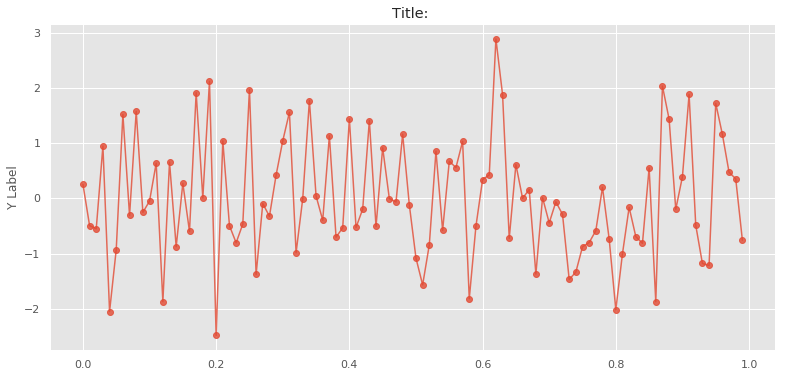

In [494]:
size = 100
x_vec = np.linspace(0,1,size+1)[0:-1]
y_vec = np.random.randn(len(x_vec))
line1 = []
for i in range(100):
    rand_val = np.random.randn(1)
    y_vec[-1] = rand_val
    line1 = live_plotter(x_vec,y_vec,line1)
    y_vec = np.append(y_vec[1:],0.0)

In [17]:
series = pd.read_csv('./lte.csv')
series.head()
# plt.plot(series.Traffic[:100])

,Date,Hour,CellName,Traffic
0,10/16/2018 0:00,0,Cell_000111,1158.69599
1,10/16/2018 0:00,0,Cell_000112,399.66906
2,10/16/2018 0:00,0,Cell_000113,117.12294
3,10/16/2018 0:00,0,Cell_001791,998.05906
4,10/16/2018 0:00,0,Cell_001792,175.95991


CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 11.7 µs


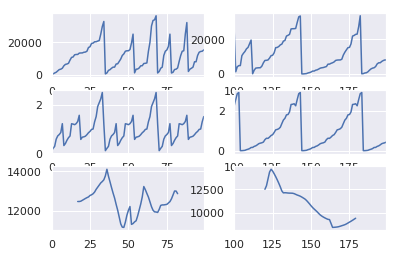

In [624]:
%time
series = pd.read_csv('./network.csv').r_asn
series1 = series[0:100]
result1 = seasonal_decompose(series1, model='multiolicative', freq=35)
# pyplot.plot(series)
# pyplot.plot(result.seasonal)

series2 = series[100:200]
result2 = seasonal_decompose(series2, model='multiolicative', freq=40)

fig, axes = plt.subplots(nrows=3, ncols=2)

series1.plot(ax=axes[0,0])
result1.seasonal.plot(ax=axes[1,0])
result1.trend.plot(ax=axes[2,0])


series2.plot(ax=axes[0,1])
result2.seasonal.plot(ax=axes[1,1])
result2.trend.plot(ax=axes[2,1])

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.11 µs
CPU times: user 368 µs, sys: 225 µs, total: 593 µs
Wall time: 527 µs


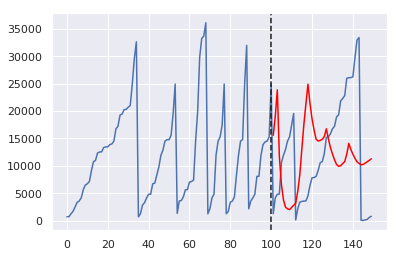

In [632]:
%time

# data = result.seasonal.values[]
data = series
left = 50
right = 100

count = right - left
new_data = data[left:right]
x = np.array(range(count), dtype=np.double)[np.newaxis]
y = np.array(new_data, dtype=np.double)[np.newaxis]
%time alpha, beta = algebraic_linear_regression_on_all_subwindows(x, y)
# new_x = np.array(range(count,2*count), dtype=np.double)[np.newaxis]
# new_x = np.array(np.full((len(x)), 1), dtype=np.double)[np.newaxis]
new_x = x
new_y = alpha + beta*new_x
pyplot.plot(range(0, right + count), data[0:right + count])
pyplot.plot(range(right, right + count), new_y[0], 'red')
plt.axvline(right, color='k', linestyle='--')
# pyplot.plot(range(right, right + count), alpha[0], 'green')
# pyplot.plot(range(right, right + count), beta[0], 'black')
pyplot.show()

In [25]:
new_y = []
for i in new_x:
    new_y.append(1)
new_y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
 plt.figure(figsize=(15,5))   
    plt.title("Скользящее среднее\n ширина окна = {}".format(window))
    plt.plot(rolling_mean, "g", label="Сглаженное значение")
        
    plt.plot(series[window:], label="Актуальное значение")
    plt.gcf().autofmt_xdate()
    plt.grid(True)